<h1 style="text-align:center">A simple Activator-Inhibitor model of pattern formation</h1>
<h4 style="text-align:center">
Dr Timothy Grocott
</h4>
<h6 style="text-align:center">
School of Biological Sciences, University of East Anglia, Norwich, UK
</h6>

<h2 style="text-decoration: underline">Equations:</h2>
<p>
    This simple Turing network is described by just two equations - one equation for the Activator molecule and one for the Inhibitor.
<p>
<p>
    Each equation has three terms:<br>
</p>
<p style="text-align:center">
    $Rate\ of\ Change = \color{blue}{Production} \color{red}{- Degradation}\color{green}{+ Diffusion}$
<br><br><br><br>
<p>
    The equation for the <b>Activator</b> is:
</p>
<p style="text-align:center">
    $\dfrac{\partial [Activator]}{\partial t} = \color{blue}{a_{Act}.\dfrac{ [Activator]^2}{[Inhibitor]}} \color{red}{- b_{Act}.[Activator]}\color{green}{+ D_{Act}\dfrac{\partial ^2[Activator]}{\partial x^2}}$
</p>
<br><br><br><br>
<p>
    The equation for the <b>Inhibitor</b> is:
</p>
<p style="text-align:center">
    $\dfrac{\partial [Inhibitor]}{\partial t} = \color{blue}{a_{Inh}.[Activator]^2} \color{red}{- b_{Inh}.[Inhibitor]}\color{green}{+ D_{Inh}\dfrac{\partial ^2[Inhibitor]}{\partial x^2}}$
</p>
<br><br><br><br>
<p>
    The following computer code simply defines these equations...
</p>

In [1]:
library(deSolve)
library(ReacTran)

## ================
## Model equations
## ================
model <- function(time, state, parms) {
  with (as.list(parms), {
    ACT <- state[1:N]
    INH <- state[(N+1):(2*N)]
    
    ## Production terms:
    productionACT <-    (aACT * ACT * ACT) / INH
    productionINH <-    (aINH * ACT * ACT)
    
    ## Degradation terms:
    degradationACT = (bACT * ACT)
    degradationINH = (bINH * INH)
    
    ## Diffusion terms:
    diffusionACT <- tran.1D(C = ACT, C.up = ACT[1], C.down = ACT[N], 
                            D = dACT, dx = xgrid)$dC
    diffusionINH <- tran.1D(C = INH, C.up = INH[1], C.down = INH[N], 
                            D = dINH, dx = xgrid)$dC
    
    ## Rate of change = Production    - Degradation    + Diffusion
    dACT              = productionACT - degradationACT + diffusionACT
    dINH              = productionINH - degradationINH + diffusionINH
    
    setTxtProgressBar(pb, time)
    return (list(c(dACT, dINH)))
  })
}

Loading required package: rootSolve
Loading required package: shape


<h2 style="text-decoration: underline">Parameters:</h2>
<p>
    Next we specify the parameters of the system, e.g.:
    <br><br>
    <li>Length of the tissue
    <li>Number of cells
    <br><br>
    <li>Duration of the simulation
    <li>Number of time-steps
    <br><br>
    <li><b>Production rate constants</b>
    <li><b>Degradation rate constants</b>
    <li><b>Diffusion rate constants</b>    
<p>
    Here are the exact same equations again, but with the <font color="red">rate constants</font> shown in red:
</p>
<p style="text-align:center">
    $\dfrac{\partial [Activator]}{\partial t} = \color{red}{a_{Act}}.\dfrac{ [Activator]^2}{[Inhibitor]} \color{red}{- b_{Act}}.[Activator]\color{red}{+ D_{Act}}\dfrac{\partial ^2[Activator]}{\partial x^2}$
</p>
</p>
<p style="text-align:center">
    $\dfrac{\partial [Inhibitor]}{\partial t} = \color{red}{a_{Inh}}.[Activator]^2\color{red}{- b_{Inh}}.[Inhibitor]\color{red}{+ D_{Inh}}\dfrac{\partial ^2[Inhibitor]}{\partial x^2}$
</p>

In [2]:
## ==================
## Model Parameters
## ==================

## Space
L <- 100                                  # Length of the 1D tissue
N <- 250                                  # Number of 1D elements (cells)
dx <- L/N                                 # Length of one 1D element (cell)
xgrid <- setup.grid.1D(N = N, x.down = L) # Output wanted at these positions

## Time
TIME <- 300                               # Duration of simulation
dt <- 1                                   # Duration of each time-step
times  <- seq(0, TIME, by = dt)           # Output wanted at these time-steps

## Rate constants
parms <- c(aACT = 0.5,                    # Production  rate constant for ACTIVATOR
           bACT = 0.1,                    # Degradation rate constant for ACTIVATOR
           dACT = 1,                      # Diffusion   rate constant for ACTIVATOR
           aINH = 1.0,                    # Production  rate constant for INHIBITOR
           bINH = 0.5,                    # Degradation rate constant for INHIBITOR
           dINH = 50)                     # Diffusion   rate constant for INHIBITOR

# Setup text progress bar - called by model function
pb <- txtProgressBar(min = 0, max = TIME, style = 3)

  |                                                                      |   0%

<h2 style="text-decoration: underline">Initial Conditions:</h2>
<p>
    These are simply the starting concentrations of the Activator and Inhibitor in each cell of the tissue.
<br><br>
</p>
</p>
    Every simulation has to start from somewhere...
</p>

In [3]:
## ===================
## Initial conditions:
## ===================
initial_conditions <- c( 
                        jitter( rep(0.1, N), 0.01, 0.01), # Activator concentrations
                        rep(0.1, N)                       # Inhibitor concentrations
                       )


<h2 style="text-decoration: underline">Run the simulation:</h2>
<p>
The computer solves (integrates) the equations for us. This tells us the concentrations of Activator and Inhibitor at each position and at each timepoint.
</p>

  |======================================================================| 100%

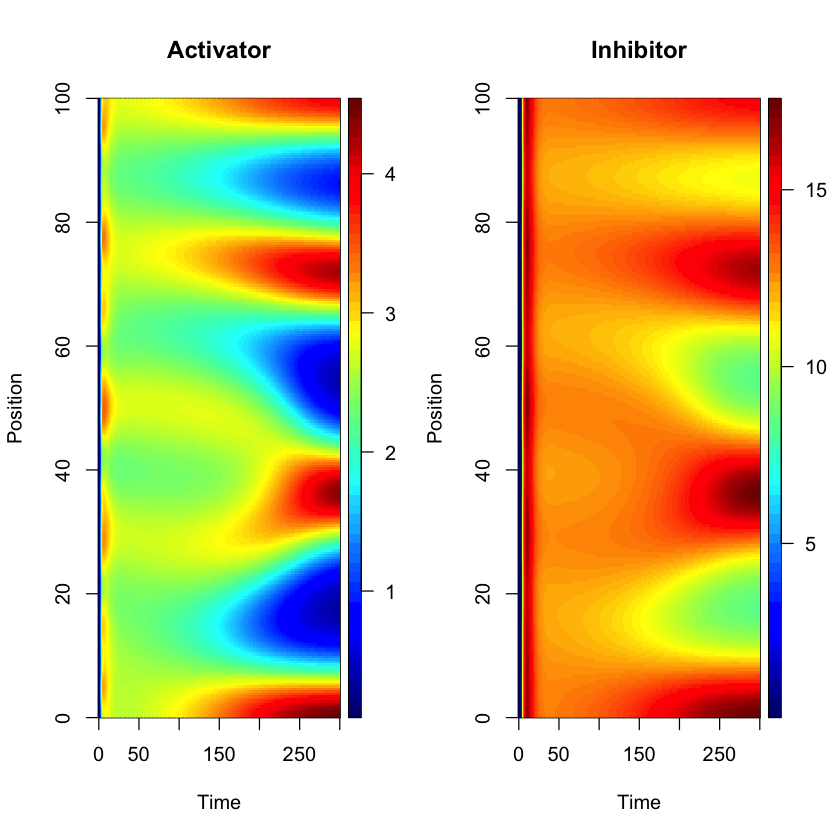

In [4]:
## ==================
## Run the simulation
## ==================
output <- ode.1D(y = initial_conditions, times = times, func = model, parms = parms, 
                 nspec = 2, names = c("Activator", "Inhibitor"))

## =================
## Plot the output
## =================
image(output, grid = seq(dx/2, L, dx), legend = TRUE, xlab = "Time", 
      ylab = "Position")